<h1>Task 2</h1>

<h2>Importing libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h3>Train Set</h3>

In [2]:
train= pd.read_csv('https://github.com/TirthShripal1/PRODIGY_DS_02/blob/main/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Test Set</h3>

In [3]:
test= pd.read_csv('https://github.com/TirthShripal1/PRODIGY_DS_02/blob/main/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h3> Describing Dataset</h3>

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3> Cleaning Dataset</h3>

In [6]:
#checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#replace null value and dropping columns with too many missing values
#use average age
train['Age'].fillna(train['Age'].mean(), inplace = True)

#use mode embarked
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

#dropping Cabin
train = train.drop(columns = ['Cabin'])

In [8]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
#similarly for test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#replace null value and dropping columns with too many missing values
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

test= test.drop(columns = ['Cabin'])

In [12]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<h3>Box plot for Outlier Detection</h3>

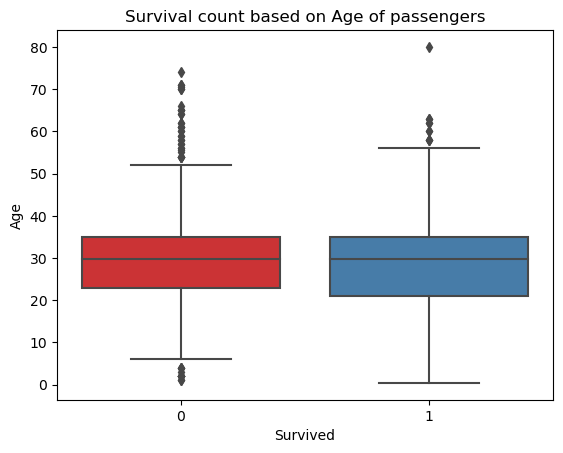

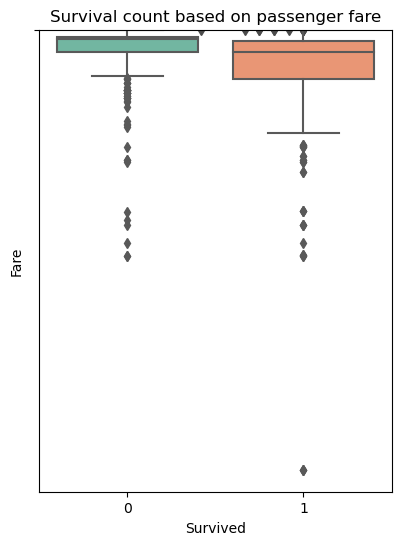

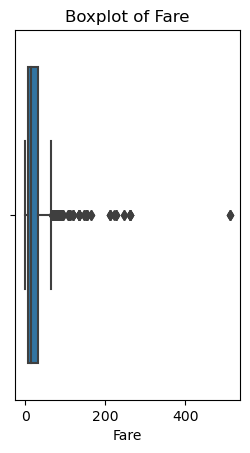

In [13]:
#For Survived and Age
sns.boxplot(x="Survived",y="Age",data=train,palette= "Set1")
plt.title("Survival count based on Age of passengers")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', data=train,palette='Set1')
plt.title('Boxplot of Age')
#For Survived and Fare
sns.boxplot(x="Survived",y="Fare",data=train,palette= "Set2")
plt.title("Survival count based on passenger fare")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()
plt.subplot(1, 2, 2)
sns.boxplot(x='Fare', data=train)
plt.title('Boxplot of Fare')
plt.show()

<h3>Visulisation of train set</h3>

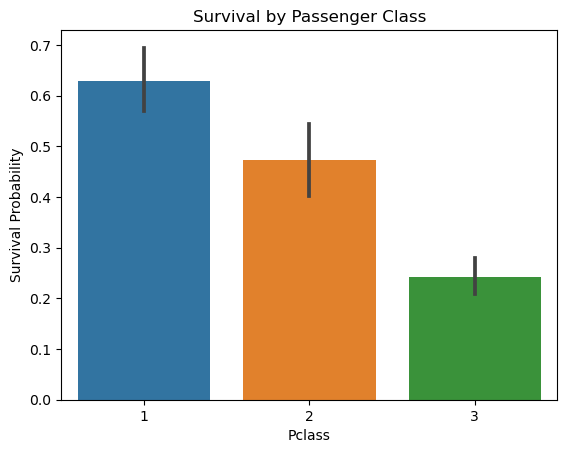

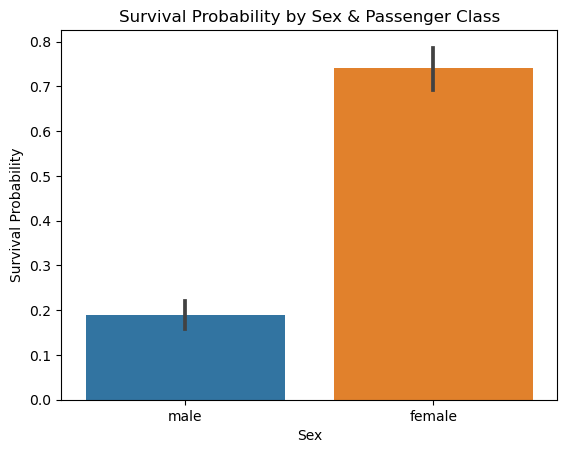

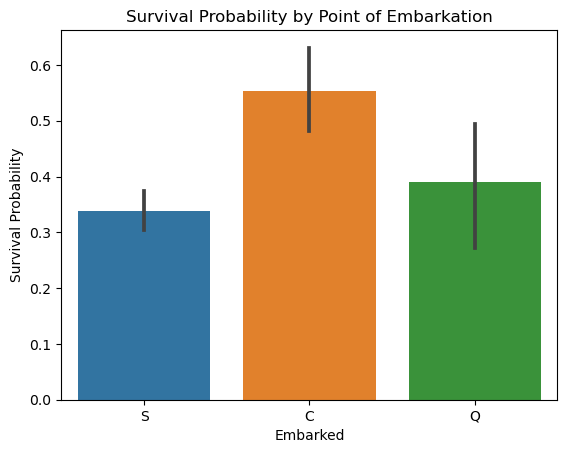

In [14]:
# Relationship between Plclass and Survived
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival by Passenger Class')
plt.show()
# Relationship between Sex and Survived
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex & Passenger Class')
plt.show()
# Relationship between Embarked and Survived
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')
plt.show()

In [15]:
train.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [16]:
test.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
test['Sex'].head()

0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int64

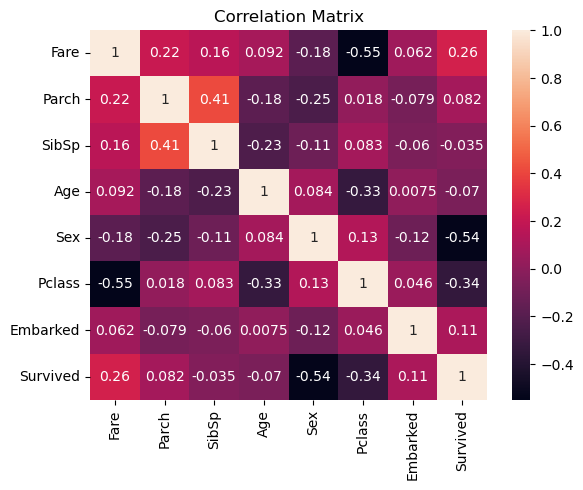

In [17]:
#correlation analysis
Df_num=train[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]
sns.heatmap(Df_num.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [18]:
#lets combine SibSp and Parch to find the Family Size
train["FamilySize"] = train['SibSp']+train['Parch']+1
test["FamilySize"] = test['SibSp']+test['Parch']+1

train.drop(columns = ['SibSp','Parch'], inplace = True)
test.drop(columns = ['SibSp','Parch'], inplace = True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,1


<h3>Regression Analysis</h3>

In [20]:
#logistic regression analysis
x_train = train[['Pclass','Sex','Age','Fare','FamilySize']]
y_train = train['Survived']

In [21]:
x_train.head()

,Pclass,Sex,Age,Fare,FamilySize
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,2
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,1


In [22]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1 )
print ('Train set:', x_train1.shape,  y_train1.shape)
print ('Test set:', x_test1.shape,  y_test1.shape)

Train set: (712, 5) (712,)
Test set: (179, 5) (179,)


In [24]:
L_reg=LogisticRegression()
y_pred =L_reg.fit(x_train1, y_train1).predict(x_test1)
# Calculate accuracy
print(f"Accuracy:{accuracy_score(y_test1, y_pred)}")

Accuracy:0.8044692737430168


In [25]:
#classification report
class_report = classification_report(y_test1, y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.83      0.84      0.84       106\n           1       0.76      0.75      0.76        73\n\n    accuracy                           0.80       179\n   macro avg       0.80      0.80      0.80       179\nweighted avg       0.80      0.80      0.80       179\n'

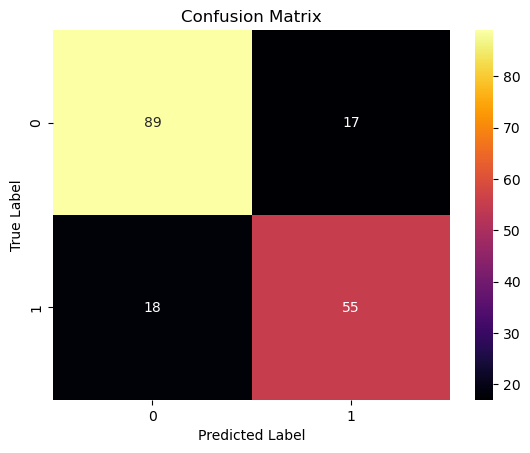

In [26]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test1, y_pred), annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
#use model to predict original test set
test_final = test[['Pclass', 'Sex','Age','Fare','FamilySize']]

In [28]:
test_predict=L_reg.predict(test_final)
test_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [29]:
pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived':test_predict})

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
